In [8]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Cargar conjunto de datos CIFAR-100
minist = keras.datasets.cifar100

# Cargar la división de entranamiento y pruebas del conjunto de datos
(training_images, training_labels), (test_images, test_labels) = minist.load_data()

# Normalizar los valores de pixeles del tren y probar las imágenes
training_images = training_images / 255.0
test_images = test_images / 255.0

# Construir el modelo de calsificación
model = keras.Sequential([
    # agregar convoluciones y maxpooling
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(2, 2),
    # agregar las mismas capas que antes
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(100, activation='softmax') # Changed output layer to 100 neurons for 100 classes
])

model.summary()

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(training_images, training_labels, epochs=10)

# Graficar el historial de entrenamiento
pd.DataFrame(history.history).plot(grid=True)

# Evaluar el modelo con datos no vistos
loss, accuracy = model.evaluate(test_images, test_labels)
print('Perdida en el conjunto de prueba: ', loss)
print('Precisión en el conjunto de prueba: ', accuracy)

#predict
index = 1
print(f'label: {test_labels[index]}')
classification = model.predict(test_images[index:index+1])
print(f'classification: \n {classification.reshape(-1,1)}')


TypeError: 'ImageDataGenerator' object is not callable

In [ ]:
print(test_labels[:30])

[[49]
 [33]
 [72]
 [51]
 [71]
 [92]
 [15]
 [14]
 [23]
 [ 0]
 [71]
 [75]
 [81]
 [69]
 [40]
 [43]
 [92]
 [97]
 [70]
 [53]
 [70]
 [49]
 [75]
 [29]
 [21]
 [16]
 [39]
 [ 8]
 [ 8]
 [70]]


In [ ]:
FIRST_IMAGE=3
SECOND_IMAGE=10
THIRD_IMAGE=25
print(f'Label: {test_labels[FIRST_IMAGE]}')
print(f'Label: {test_labels[SECOND_IMAGE]}')
print(f'Label: {test_labels[THIRD_IMAGE]}')

Label: [51]
Label: [71]
Label: [16]


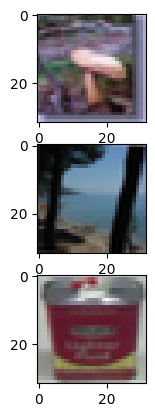

In [ ]:
f, axarr = plt.subplots(3,1)
axarr[0].imshow(test_images[FIRST_IMAGE].reshape(32,32,3))
axarr[1].imshow(test_images[SECOND_IMAGE].reshape(32,32,3))
axarr[2].imshow(test_images[THIRD_IMAGE].reshape(32,32,3))

1/1 [==============================] - 0s 61ms/step


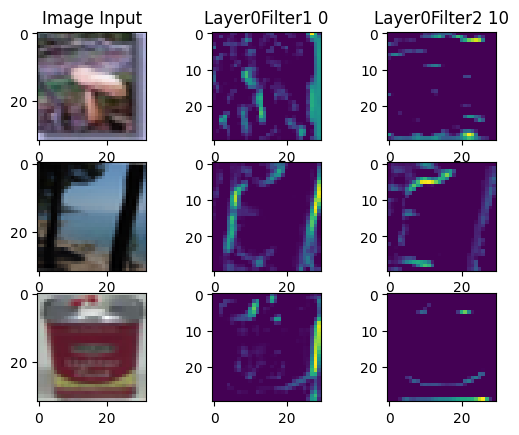

In [ ]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(32,32,3))
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,32,32,3))[layer]
axarr[0,1].set_title("Layer"+str(layer) + "Filter1 "+str(filter1))
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer) + "Filter2 "+str(filter2))
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(32,32,3))
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,32,32,3))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(32,32,3))
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,32,32,3))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])


1/1 [==============================] - 0s 27ms/step


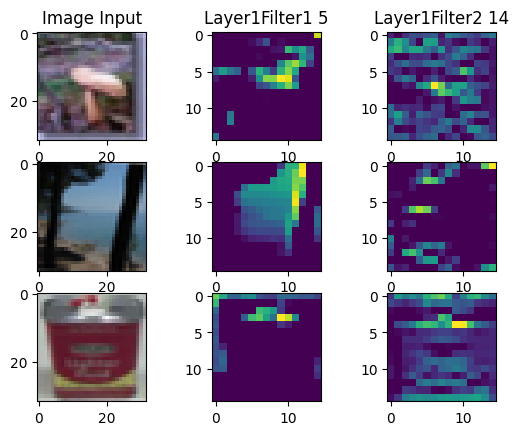

In [ ]:
layer = 1
filter1 = 5
filter2 = 14

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

f, axarr = plt.subplots(3,3)

axarr[0,0].set_title("Image Input")
axarr[0,0].imshow(test_images[FIRST_IMAGE].reshape(32,32,3))
f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1,32,32,3))[layer]
axarr[0,1].set_title("Layer"+str(layer) + "Filter1 "+str(filter1))
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title("Layer"+str(layer) + "Filter2 "+str(filter2))
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE].reshape(32,32,3))
f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1,32,32,3))[layer]
axarr[1,1].imshow(f2[0,:,:,filter1])
axarr[1,2].imshow(f2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE].reshape(32,32,3))
f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1,32,32,3))[layer]
axarr[2,1].imshow(f3[0,:,:,filter1])
axarr[2,2].imshow(f3[0,:,:,filter2])